# Общий анализ датасета

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

In [12]:
# !gdown 1KYgELspl8kDpRB9sHTuydaQhKgqtYG9T
# !gdown 1GU3EX950oTp8Pt_mI5-M0pvkUyS9XHZy

Загружаем датасеты

In [28]:
data1 = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Стадия 1.csv')
data2 = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Стадия 2.csv')
data3 = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Стадия 3.csv')

params = pd.read_csv('/home/biouser/Downloads/breast_cancer_data.xlsx - Описание данных.csv')

data = pd.concat([data1, data2, data3], ignore_index=True)
data.head().T

,0,1,2,3,4
patient_id,BC_1_0001,BC_1_0002,BC_1_0003,BC_1_0004,BC_1_0005
stage,1,1,1,1,1
age,59,46,60,56,41
gender,Ж,Ж,Ж,Ж,Ж
menopausal_status,postmenopausal,premenopausal,postmenopausal,postmenopausal,perimenopausal
family_history,False,True,False,False,False
molecular_subtype,HR+HER2-,TNBC,TNBC,HR+HER2-,HR-HER2+
er_status,True,False,False,True,False
pr_status,True,False,False,False,False
her2_status,False,False,False,False,True


In [29]:
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = (data[bool_cols].astype(int))

features_to_transform = ['ki67_level', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'survival_months']

for feature in features_to_transform:
    data[feature] = data[feature].str.replace(',', '.', regex=False)
    data[feature] = data[feature].astype(float)

data.head(5).T

,0,1,2,3,4
patient_id,BC_1_0001,BC_1_0002,BC_1_0003,BC_1_0004,BC_1_0005
stage,1,1,1,1,1
age,59,46,60,56,41
gender,Ж,Ж,Ж,Ж,Ж
menopausal_status,postmenopausal,premenopausal,postmenopausal,postmenopausal,perimenopausal
family_history,0,1,0,0,0
molecular_subtype,HR+HER2-,TNBC,TNBC,HR+HER2-,HR-HER2+
er_status,1,0,0,1,0
pr_status,1,0,0,0,0
her2_status,0,0,0,0,1


Статистика по признакам датасета

In [30]:
data.describe(include='all').T.assign(Var_Type = data.dtypes, Num_Unique = data.nunique(), NaNs = data.isna().sum())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Var_Type,Num_Unique,NaNs
patient_id,3000,3000,BC_3_1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,3000,0
stage,3000.0,NaN,NaN,NaN,2.0,0.816633,1.0,1.0,2.0,3.0,3.0,int64,3,0
age,3000.0,NaN,NaN,NaN,56.980333,12.906645,25.0,48.0,57.0,65.0,90.0,int64,66,0
gender,3000,1,Ж,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,1,0
menopausal_status,3000,3,postmenopausal,2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,3,0
family_history,3000.0,NaN,NaN,NaN,0.145667,0.352831,0.0,0.0,0.0,0.0,1.0,int64,2,0
molecular_subtype,3000,4,HR+HER2-,2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,4,0
er_status,3000.0,NaN,NaN,NaN,0.860667,0.346352,0.0,1.0,1.0,1.0,1.0,int64,2,0
pr_status,3000.0,NaN,NaN,NaN,0.692667,0.461466,0.0,0.0,1.0,1.0,1.0,int64,2,0
her2_status,3000.0,NaN,NaN,NaN,0.204667,0.403525,0.0,0.0,0.0,0.0,1.0,int64,2,0


Описание признаков

In [32]:
display(params)

,Параметр,Описание
0,patient_id,Уникальный идентификатор пациента
1,stage,Стадия РМЖ (1-4)
2,age,Возраст пациента
3,gender,Пол пациента
4,menopausal_status,Менопаузальный статус (premenopausal/perimenop...
5,family_history,Семейный анамнез РМЖ
6,molecular_subtype,Молекулярный подтип (HR+HER2-/HR+HER2+/HR-HER2...
7,er_status,Статус рецепторов эстрогена
8,pr_status,Статус рецепторов прогестерона
9,her2_status,Статус HER2


Делим признаки на числовые и категориальные

In [33]:
num_features = data.select_dtypes(include=[np.number]).columns.to_list()
cat_features = data.select_dtypes(include=[object]).columns.to_list()
cat_features.append(bool_cols)

print("Numerical features:", len(num_features))
print("Categorical features:", len(cat_features))

print(num_features)
print(cat_features)

Numerical features: 18
Categorical features: 10
['stage', 'age', 'family_history', 'er_status', 'pr_status', 'her2_status', 'brca_mutation', 'ki67_level', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'has_metastasis', 'survival_months', 'performance_status', 'tumor_grade', 'positive_lymph_nodes']
['patient_id', 'gender', 'menopausal_status', 'molecular_subtype', 'treatment', 'surgery_type', 'metastasis_sites', 'lymph_node_status', 'treatment_response', Index(['family_history', 'er_status', 'pr_status', 'her2_status',
       'brca_mutation', 'has_metastasis'],
      dtype='object')]


In [34]:
cat_features = []
num_features = []

for col in data.columns:

    n_unique = data[col].nunique(dropna=True)

    # 1) категориальные: мало уникальных значений (<=5)
    #    или тип object/category/bool
    if (
        n_unique <= 5
        or data[col].dtype == 'object'
        or data[col].dtype.name == 'category'
        or data[col].dtype == 'bool'
    ):
        cat_features.append(col)

    # 2) числовые признаки: все остальные numeric
    elif is_numeric_dtype(data[col]):
        num_features.append(col)

print("Категориальные признаки:", cat_features)
print(len(cat_features))
print("Числовые признаки:", num_features)
print(len(num_features))


Категориальные признаки: ['patient_id', 'stage', 'gender', 'menopausal_status', 'family_history', 'molecular_subtype', 'er_status', 'pr_status', 'her2_status', 'brca_mutation', 'treatment', 'surgery_type', 'has_metastasis', 'metastasis_sites', 'performance_status', 'tumor_grade', 'lymph_node_status', 'treatment_response']
18
Числовые признаки: ['age', 'ki67_level', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'survival_months', 'positive_lymph_nodes']
9


Гистограммы частот

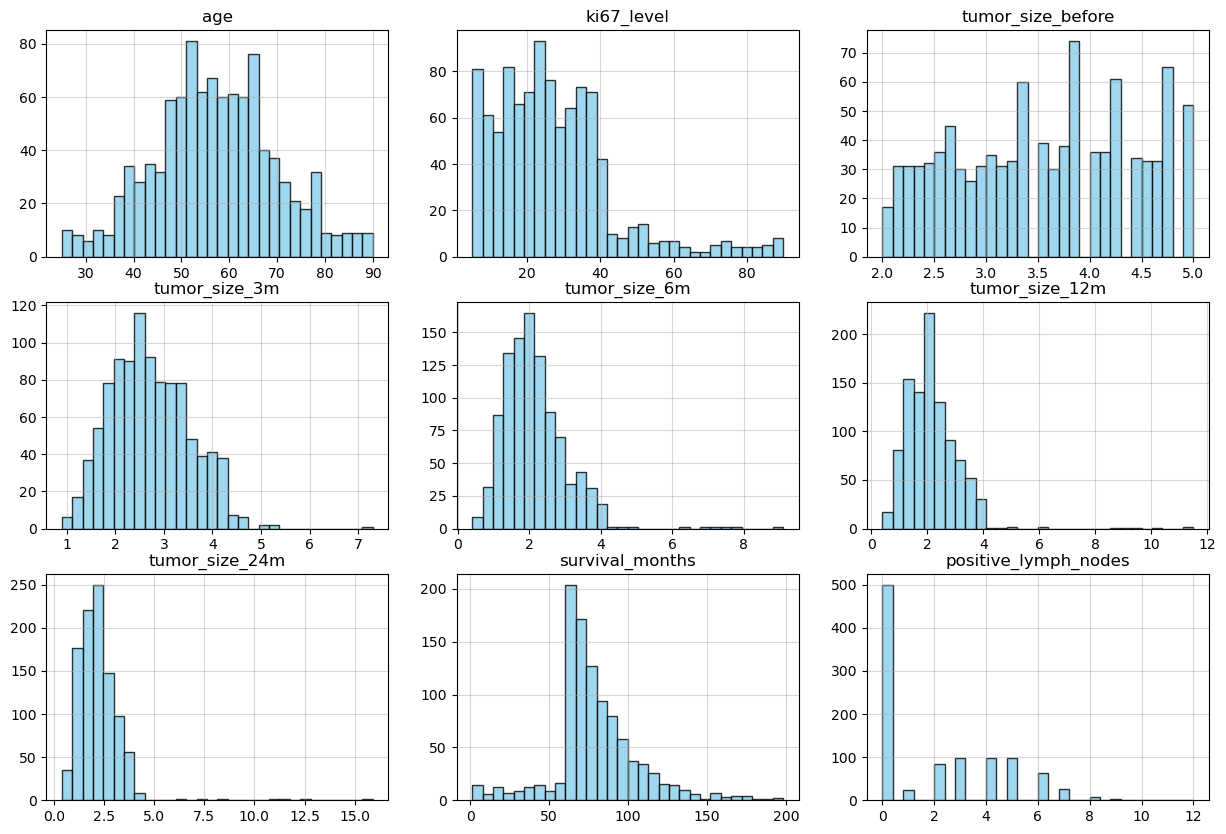

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
axes = ax.ravel()

for n, trait in enumerate(num_features):
    axes[n].hist(data[trait], bins=30, edgecolor='black', alpha=0.8, color='skyblue')
    axes[n].set_title(trait)
    axes[n].grid(True, alpha=0.5)

Боксплоты

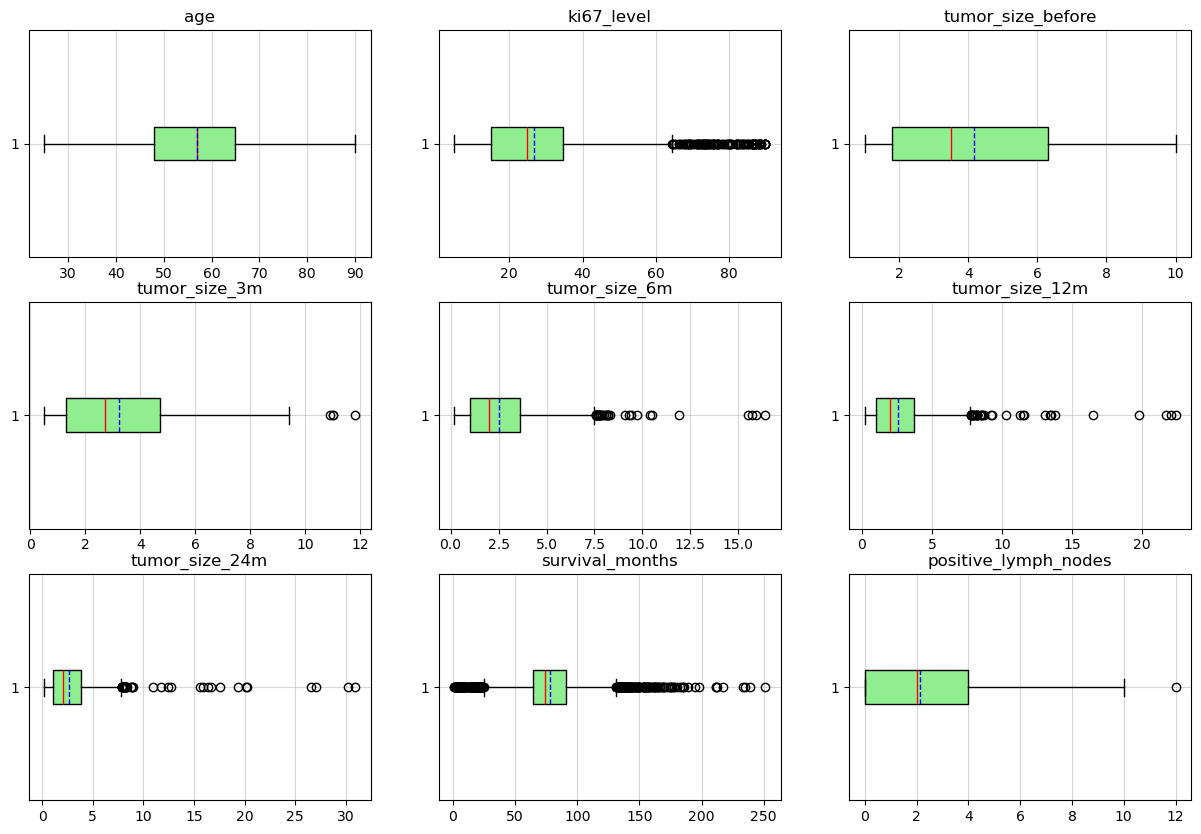

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
axes = ax.ravel()

for n, trait in enumerate(num_features):
    axes[n].boxplot(data[trait], vert=False, showfliers=True, showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), medianprops=dict(color='red'), meanprops=dict(color='blue'))
    axes[n].set_title(trait)
    axes[n].grid(True, alpha=0.5)

Матрица корреляции для категориальных признаков

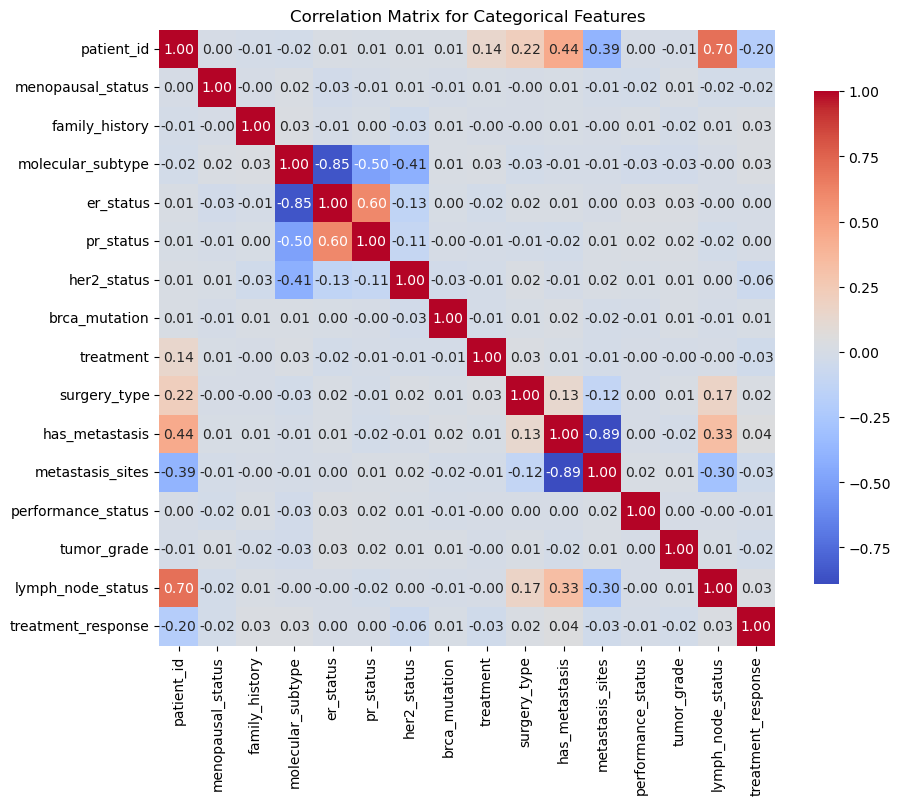

In [36]:
cat_features_wo_gender = [c for c in cat_features if c not in ['gender', 'stage']]
cat_data = data[cat_features_wo_gender].apply(lambda x: x.astype('category').cat.codes)

plt.figure(figsize=(10, 8))
sns.heatmap(cat_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Categorical Features')
plt.show()

Пайплоты

IndexError: index 5 is out of bounds for axis 0 with size 5

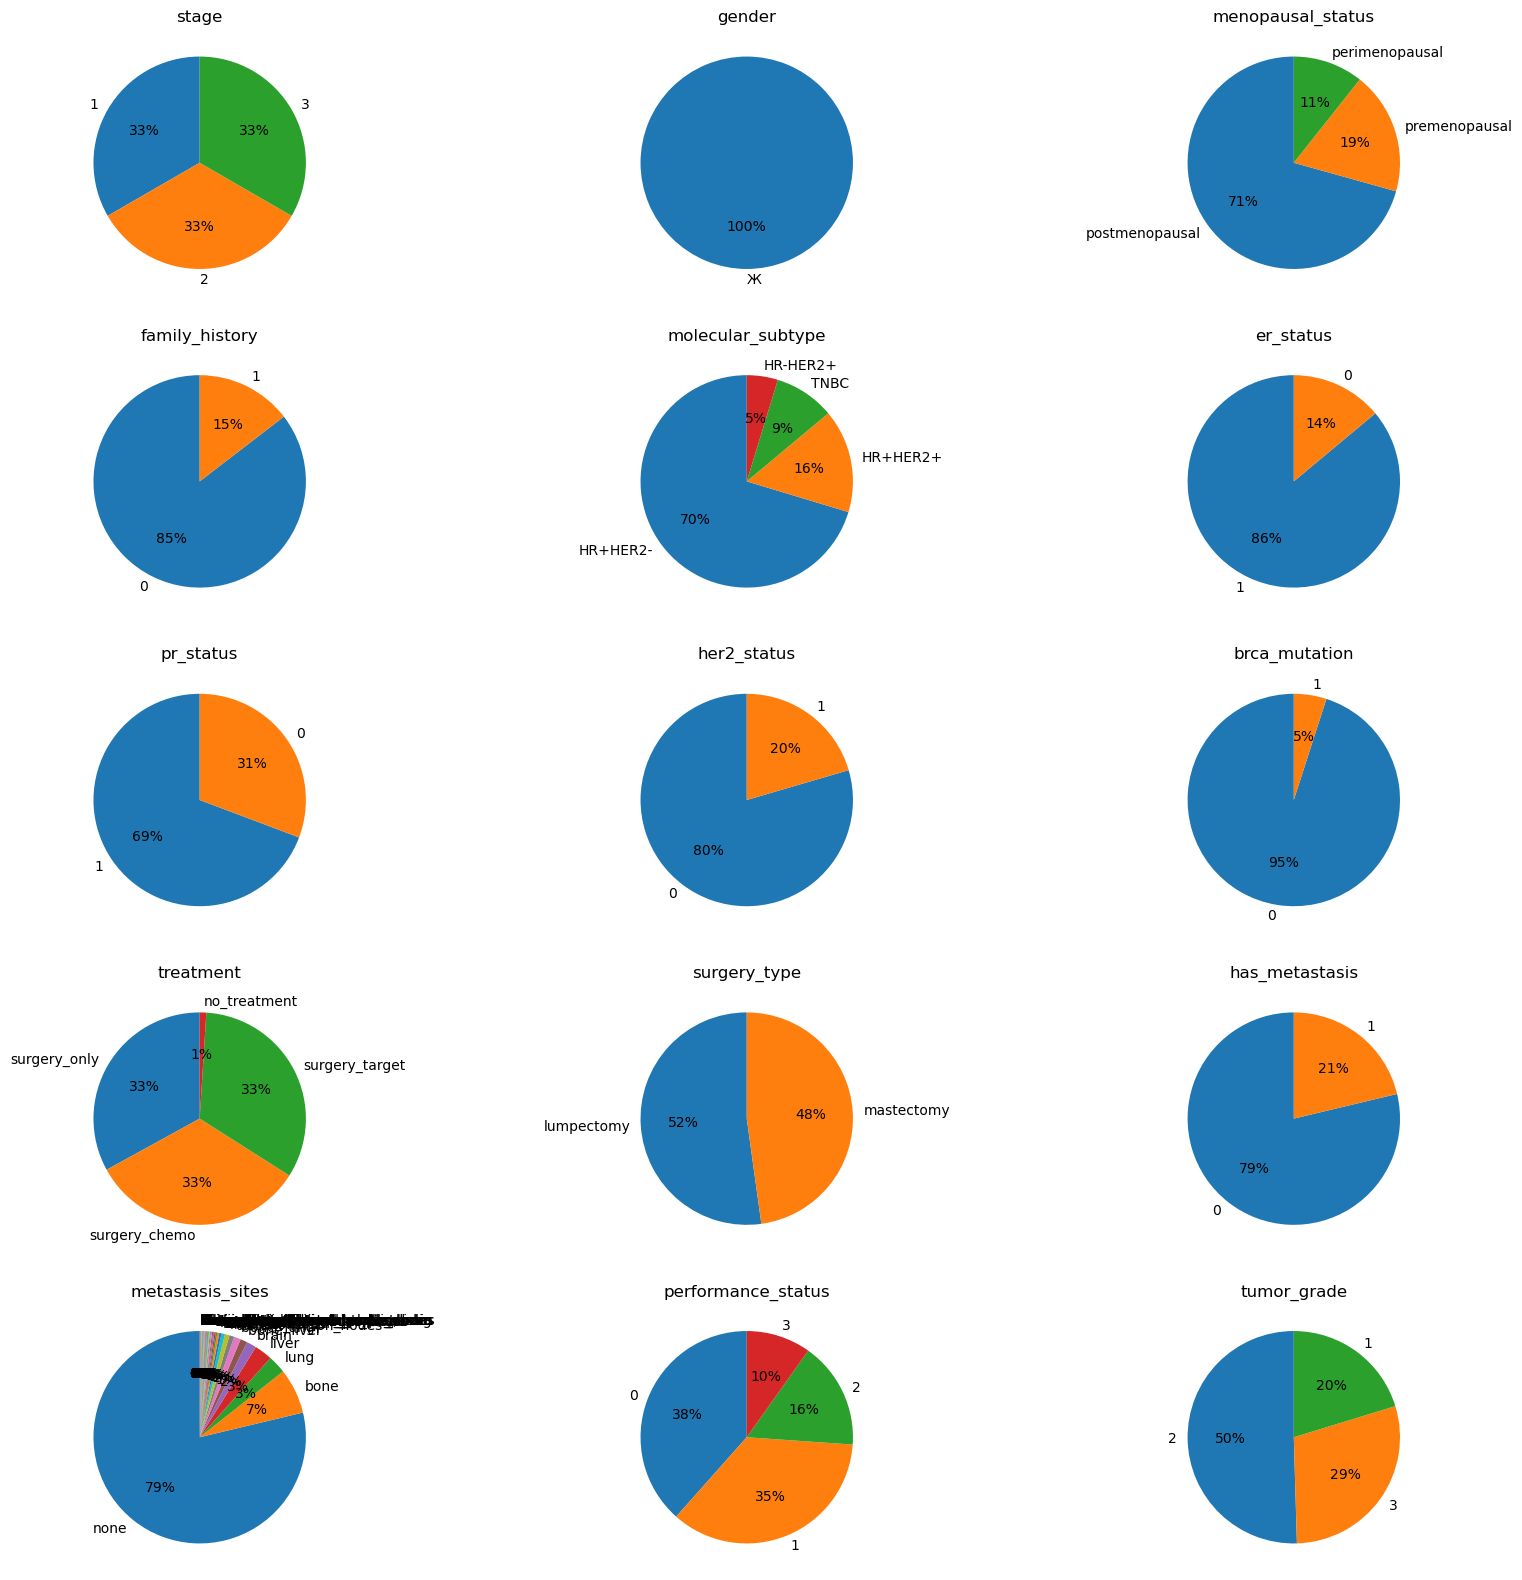

In [37]:
cat_features_for_pieplot = [c for c in cat_features if c not in ['patient_id']]
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for n, cat in enumerate(cat_features_for_pieplot):
    pie_number=[n//3, n%3]
    ax[pie_number[0], pie_number[1]].pie(data[cat].value_counts(), startangle=90, labels=data[cat].value_counts().index ,autopct='%1.0f%%')
    ax[pie_number[0], pie_number[1]].set_title(cat)

# Проектирование модели

## Модель

In [43]:
import numpy as np
import pandas as pd

from scipy.integrate import solve_ivp
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

df = data.copy()

# точки измерения размера опухоли (в месяцах)
times = np.array([0.0, 3.0, 6.0, 12.0, 24.0])


ImportError: /home/biouser/anaconda3/lib/python3.13/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /home/biouser/anaconda3/lib/python3.13/site-packages/pyarrow/../../../libarrow.so.2100)

In [ ]:
# 1. КОЭФФИЦИЕНТ ЭФФЕКТИВНОСТИ ЛЕЧЕНИЯ

def treatment_effect_coeff(patient_data) -> float:
    """
    Коэффициент эффективности системного лечения.

    Использует:
      - row["treatment"]:
          "no_treatment", "surgery_only",
          "surgery_chemo",
          "surgery_target"
      - row["molecular_subtype"]:
          "HR+HER2-", "HR+HER2+", "HR-HER2+", "TNBC"
    """

    treatment = patient_data["treatment"]
    subtype = patient_data["molecular_subtype"]

    # нет системной терапии
    if treatment == "no_treatment":
        return 0.0
    
    if treatment == 'surgery_only':
        return 0.5        

    # 1) ХИМИОТЕРАПИЯ
    if treatment == "surgery_chemo":
        if subtype == "HR+HER2-":
            # люминальные HR+HER2- → низкий pCR (~8–10%) → база
            return 1.0
        elif subtype == "TNBC":
            # TNBC → pCR ~3–4 раза чаще, чем у HR+HER2-
            return 1.5
        elif subtype in ["HR+HER2+", "HR-HER2+"]:
            # HER2+ → хемочувствительность выше, чем у чисто люминальных
            return 1.3
        else:
            return 1.0

    # 2) ТАРГЕТНАЯ ТЕРАПИЯ (anti-HER2 + гормонотерапия)
    if treatment == "surgery_target":
        # anti-HER2 (trastuzumab-подобные)
        if subtype == "HR-HER2+":
            # HER2+/HR- → максимальный эффект химио + anti-HER2
            return 1.8
        elif subtype == "HR+HER2+":
            # HER2+/HR+ → сильный эффект химио + anti-HER2 + гормонотерапии
            return 1.6

        # чистая гормонотерапия (HR+, HER2-)
        elif subtype == "HR+HER2-":
            # эндокринная терапия даёт умеренный длительный эффект
            return 1.3

        # TNBC → таргетных мишеней (HER2/HR) нет
        elif subtype == "TNBC":
            return 0.2

        else:
            return 1.0

    # запасной вариант
    return 1.0

# 2. МОДЕЛЬ ГОМПЕРТЦА С ЛЕЧЕНИЕМ

def gompertz_treated_rhs(V, r, K, k_max):
    """
    Правая часть ОДУ:

      dV/dt = r * V * ln(K / V) - k_max * coeff * V

      r      – скорость роста
      K      – максимальный размер (предел)
      k_max  – базовый kill-rate терапии
      coeff  – коэффициент эффективности (treatment_effect_coeff)
    """
    return r * V * math.log(K / V) - k_max * V

# глобальный K: чуть больше максимального наблюдаемого размера
K_global = 12.0
# (
#     df[['tumor_size_before', 'tumor_size_3m', 'tumor_size_6m',
#             'tumor_size_12m', 'tumor_size_24m']].max().max() * 1.2
# )

print("K_global = ", K_global)


# 3. СИМУЛЯЦИЯ И ПОДГОНКА r, k_max ДЛЯ ОДНОГО ПАЦИЕНТАs

def simulate_patient(r, patient_data):
    """
    Численно решает ОДУ Гомпертца для одной пациентки
    с учётом её типа лечения и подтипа.

    params = (r, k_max)
    row    = строка с данными пациентки
    Возвращает V(t) в точках 'times'.
    """

    V0 = patient_data['tumor_size_before']
    k_max = treatment_effect_coeff(patient_data)

    sol = solve_ivp(
        lambda t, y: gompertz_treated_rhs(y[0], r, K_global, k_max),
        [0, 24],
        [V0],
        t_eval=times,
        max_step=0.25
    )

    if not sol.success:
        return np.full_like(times, np.nan)
    
    return sol.y[0]

def loss_for_patient(equation_params, patient_data):
    """
    Функция потерь: сумма квадратов разницы
    между моделью и реальными размерами опухоли.
    """

    V_model = simulate_patient(equation_params, patient_data)
    
    if np.any(~np.isfinite(V_model)):
        return 1e6  # штраф за неудачную интеграцию

    V_data = np.array([
        patient_data['tumor_size_before'],
        patient_data['tumor_size_3m'],
        patient_data['tumor_size_6m'],
        patient_data['tumor_size_12m'],
        patient_data['tumor_size_24m'],
    ], dtype=float)

    return float(np.sum((V_model - V_data) ** 2))

def fit_patient(patient_data):
    """
    Подгоняет параметры (r, k_max) для одной пациентки
    методом L-BFGS-B, минимизируя loss_for_patient.
    Возвращает (r_fit, k_fit, SSE).
    """

    # старт: умеренный рост и умеренная чувствительность
    x0 = np.array([0.3, 0.3])          # (r0, k_max0)
    bounds = [(0.01, 1.2), (0.0, 2.0)] # разумные границы для r и k_max

    result = minimize(
        lambda x: loss_for_patient(x, patient_data),
        x0=x0,
        bounds=bounds,
        method='L-BFGS-B',
        options={'maxiter': 80}
    )

    if not result.success:
        return np.nan, np.nan, result.fun

    r_fit, k_fit = result.x
    return r_fit, k_fit, result.fun

# 4. ПОДГОНКА ДЛЯ ВСЕХ ПАЦИЕНТОК С ДИНАМИКОЙ

# добавляем колонки для результатов фита
df['r_fit'] = np.nan
df['k_fit'] = np.nan
df['fit_sse'] = np.nan
df['fit_rmse'] = np.nan

for i, row in df.iterrows():
    r_fit, k_fit, err = fit_patient(row)
    df.loc[i, 'r_fit'] = r_fit
    df.loc[i, 'k_fit'] = k_fit
    df.loc[i, 'fit_sse'] = err
    df.loc[i, 'fit_rmse'] = np.sqrt(err / len(times))

# лёгкая фильтрация по качеству фита (опционально)
rmse_threshold = 1.0  # см
df_train_r = df[df['fit_rmse'] < rmse_threshold].dropna(subset=['r_fit']).reset_index(drop=True)

# 6. ОБУЧЕНИЕ CatBoost для предсказания r

# признаки для предсказания модели
patient_features_for_prediction = [
    'tumor_size_before',
    'age',
    'ki67_level',
    'tumor_grade',
    'molecular_subtype',
    'brca_mutation',
    'family_history',
    'performance_status',
    'menopausal_status',
]

# используем только те признаки, которые реально есть в датасете
feature_cols = [category for category in patient_features_for_prediction if category in df_train_r.columns]

X_r = df_train_r[feature_cols].copy()
y_r = df_train_r['r_fit'].copy()

X_train, X_val, y_train, y_val = train_test_split(
    X_r,
    y_r,
    test_size=0.2,
    random_state=42,
)

# 3) Индексы категориальных признаков
cat_features_idx = [
    i for i, col in enumerate(feature_cols)
    if X_r[col].dtype == 'object'
       or str(X_r[col].dtype).startswith('category')
       or X_r[col].dtype == bool
]

# 4) Обёртки выборок Pool для загрузки в CatBoost
train_pool = Pool(X_train, y_train, cat_features=cat_features_idx)
val_pool = Pool(X_val, y_val, cat_features=cat_features_idx)

# 5) Обучение модели только для r
model_r = CatBoostRegressor(
    loss_function='RMSE',
    depth=4,
    learning_rate=0.05,
    iterations=400,
    random_seed=42,
    verbose=False
)

model_r.fit(train_pool, eval_set=val_pool, verbose=False)

# 6) Оценка на валидации
y_val_pred = model_r.predict(val_pool)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val   = r2_score(y_val, y_val_pred)

# модель для r
model_r_prediction = CatBoostRegressor(
    loss_function='RMSE',
    depth=4,
    learning_rate=0.05,
    iterations=200,
    random_seed=42,
    verbose=False
)

model_r_prediction.fit(train_pool)


# 6. ОЦЕНКА r ДЛЯ НОВОЙ ПАЦИЕНТКИ С ПОМОЩЬЮ CatBoost

def estimate_r_catboost(patient_params, model_r, feature_cols, cat_features_idx):
    """
    Оценка скорости роста r для отдельного пациента
    по его биологическим и клиническим признакам
    с использованием обученной CatBoost-модели.
    """
    # приводим строку к DataFrame из 1 строки с теми же колонками
    X_row = pd.DataFrame({col: [patient_params[col]] for col in feature_cols})
    pool = Pool(X_row, cat_features=cat_features_idx)
    r_pred = float(model_r.predict(pool)[0])
    return r_pred

# 7. ПРОГНОЗ ДЛЯ "ЧИСТОГО" ПАЦИЕНТА (Только биопсия + терапия), без данных о динамики опухоли в прошлом

def predict_new_patient_with_catboost(patient_params,
                                      model_r,
                                      feature_cols,
                                      cat_features_idx,
                                      t_end: float = 36.0,
                                      dt: float = 0.25,
                                      V0: float | None = None,
                                      K: float | None = None,
                                      k_max_base: float = 0.3):
    """
    Прогноз динамики опухоли для пациентки без известной истории роста.

    row         – строка с данными пациентки (pandas.Series)
    model_r     – обученная CatBoost-модель для r
    feature_cols, cat_features_idx – список признаков и индексы категориальных
    t_end       – горизонт прогноза (месяцы)
    dt          – шаг по времени (месяцы)
    V0          – начальный размер опухоли; если None, берём tumor_size_before
    K           – предел размера; если None, используем K_global
    k_max_base  – базовый kill-rate (масштаб эффекта лечения)

    Возвращает:
      t_grid    – массив времён
      V_pred    – прогноз размера опухоли
      params    – словарь с использованными параметрами
    """
    # начальный размер
    if V0 is None:
        V0 = float(patient_params['tumor_size_before'])

    # предел размера
    if K is None:
        K = K_global

    # индивидуальная оценка r через CatBoost
    r_est = estimate_r_catboost(patient_params, model_r, feature_cols, cat_features_idx)

    # коэффициент эффективности лечения (treatment + molecular_subtype)
    k_max = treatment_effect_coeff(patient_params)

    # итоговый k_max
    k_max = k_max_base

    # сетка времени и решение ОДУ
    t_grid = np.arange(0.0, t_end + dt, dt)

    def rhs(t, y):
        return gompertz_treated_rhs(t, y[0], r_est, K, k_max)

    sol = solve_ivp(rhs, [0, t_end], [V0], t_eval=t_grid, max_step=dt)

    if not sol.success:
        raise RuntimeError(f"ODE solver failed: {sol.message}")

    V_pred = sol.y[0]

    params = {
        "r_est": r_est,
        "K": K,
        "k_max": k_max,
    }

    return t_grid, V_pred, params



K_global =  12.0


TypeError: gompertz_treated_rhs() takes 4 positional arguments but 5 were given